# Microdados do Exame Nacional de Avaliação da Formação Médica - Enamed (INEP)
[link de acesso](https://dados.gov.br/dados/conjuntos-dados/microdados-do-exame-nacional-de-avaliao-da-formao-mdica---enamed)

Microdados públicos do Exame Nacional de Avaliação da Formação Médica (Enamed), aplicado pelo Ministério da Educação pela primeira vez em outubro de 2025. São apresentados dados gerais do exame, incluindo notas, respostas aos itens e informações do questionário socioeconômico.


* Número de registros: 39794
* Colunas: 27


## Significado das variáveis

* NU_ANO: Ano de realização do exame (2025).

* CO_CURSO: Código de identificação do curso de graduação do participante.

* CO_CADERNO: Código do modelo de prova (1 ou 2) respondido pelo participante.

* DS_VT_ACE_OBJ: Vetor de 100 caracteres que representa o acerto (1) ou erro (0) do participante em cada uma das 90 questões válidas da prova. As outras posições podem conter '6' (anulada) ou '8' (desconsiderada pela TRI). Esta é a variável mais importante para análises de desempenho.

* TP_PR_GER: Tipo de presença na prova. Valores comuns: 555 (Presente com resultado válido), 222 (Ausente), 334 (Eliminado).

* PROFICIENCIA: A proficiência do participante na prova objetiva, calculada pela Teoria de Resposta ao Item (TRI). É uma nota padronizada (valor theta).

* NT_GER: A nota da prova objetiva, calculada a partir da TRI, em uma escala de 0 a 100.

* QT_ACERTO_AREA_1 a QT_ACERTO_AREA_5: Número de acertos em cada uma das cinco grandes áreas da medicina (Clínica Médica, Pediatria, Cirurgia Geral, Ginecologia e Obstetrícia, Medicina da Família e Comunidade/Saúde Coletiva).

* PER_ACERTO_ENARE: Percentual de acertos para fins do Enare, considerando questões anuladas e desconsideradas.

* CO_RS_I1 a CO_RS_I9: Respostas do Questionário de Percepção da Prova, com códigos de 'A' a 'E' para cada pergunta (ex: dificuldade da prova, tempo gasto, clareza dos enunciados).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração para visualizações mais bonitas e informativas
plt.rcParams['figure.figsize'] = (12, 6)

# Carregando o dataset
df = pd.read_csv('enamed_resultado.csv',
                 encoding='utf-8',
                 na_values=['', 'NA', ' .'], # Considera alguns valores como NaN
                 low_memory=False) # Para evitar warnings com muitas colunas


print("\nInformações do DataFrame:")
df.info()

# %%
# Verificando a contagem de valores ausentes (NaN) por coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# %%
# Análise da variável de presença (TP_PR_GER)
print("\nDistribuição do Tipo de Presença (TP_PR_GER):")
print(df['TP_PR_GER'].value_counts())
print("\nProporção de cada tipo de presença:")
print(df['TP_PR_GER'].value_counts(normalize=True) * 100)


df_presentes = df[df['TP_PR_GER'] == 555].copy()

print(f"Total de participantes com resultado válido: {len(df_presentes)}")


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39794 entries, 0 to 39793
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_ANO            39794 non-null  int64  
 1   CO_CURSO          39794 non-null  int64  
 2   CO_CADERNO        39793 non-null  float64
 3   NU_ITEM           39793 non-null  float64
 4   NU_ITEM_Z         39793 non-null  float64
 5   NU_ITEM_X         39793 non-null  float64
 6   DS_VT_GAB_OBJ     39794 non-null  object 
 7   DS_VT_ACE_OBJ     39794 non-null  object 
 8   DS_VT_ESC_OBJ     39794 non-null  object 
 9   TP_PR_GER         39794 non-null  int64  
 10  PROFICIENCIA      39256 non-null  float64
 11  NT_GER            39256 non-null  float64
 12  QT_ACERTO_AREA_1  39793 non-null  float64
 13  QT_ACERTO_AREA_2  39793 non-null  float64
 14  QT_ACERTO_AREA_3  39793 non-null  float64
 15  QT_ACERTO_AREA_4  39793 non-null  float64
 16  QT_ACERTO_ARE


**Comentários iniciais sobre a Limpeza e Estrutura:**
* O dataset tem 39794 registros e 27 colunas, conforme esperado, sendo 39256 registros com resultado válidos.
* A maioria das colunas, incluindo as notas, acertos e as respostas do questionário, contém valores.
* Colunas como `DS_VT_ACE_OBJ` e `DS_VT_ESC_OBJ` são do tipo `object` (string) e representam vetores longos, que podem ser expandidos para análises mais detalhadas por questão.
* Observamos valores ausentes (NaN) em algumas colunas de resposta do questionário (ex: `CO_RS_I1`), o que é comum quando participantes deixam perguntas sem resposta.
* A grande maioria dos participantes tem o status `555` (Presente com resultado válido). Os outros registros são de ausentes ou eliminados, mas vamos filtrá-los para as análises de desempenho.

In [2]:
# Selecionando as colunas de interesse para a análise descritiva
colunas_desempenho = ['PROFICIENCIA', 'NT_GER',
                      'QT_ACERTO_AREA_1', 'QT_ACERTO_AREA_2', 'QT_ACERTO_AREA_3',
                      'QT_ACERTO_AREA_4', 'QT_ACERTO_AREA_5', 'PER_ACERTO_ENARE']

print("\nEstatísticas Descritivas de Desempenho (Participantes Presentes):")
display(df_presentes[colunas_desempenho].describe())


print("Análise de Moda, variância e desvio padrão:\n" + "="*50)

for col in colunas_desempenho:
    moda = df_presentes[col].mode()
    variancia = df_presentes[col].var()
    desvio_padrao = df_presentes[col].std()
    print(f"\n** {col} **")
    # A moda pode ter mais de um valor
    moda_str = ', '.join([f"{val:.4f}" for val in moda.values])
    print(f"  Moda: {moda_str}")
    print(f"  Variância = {variancia:.4f}")
    print(f"  Desvio Padrão = {desvio_padrao:.4f}")

print("\nQuartis e Intervalo Interquartil (IQR):")
for col in colunas_desempenho:
    Q1 = df_presentes[col].quantile(0.25)
    Q3 = df_presentes[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"  {col}: Q1 = {Q1:.4f}, Q3 = {Q3:.4f}, IQR = {IQR:.4f}")



Estatísticas Descritivas de Desempenho (Participantes Presentes):


,PROFICIENCIA,NT_GER,QT_ACERTO_AREA_1,QT_ACERTO_AREA_2,QT_ACERTO_AREA_3,QT_ACERTO_AREA_4,QT_ACERTO_AREA_5,PER_ACERTO_ENARE
count,39256.000000,39256.000000,39256.000000,39256.000000,39256.000000,39256.000000,39256.000000,39256.000000
mean,-0.113298,65.034260,11.101055,11.399862,9.757948,11.244065,12.222743,65.725673
std,0.616645,10.820298,2.915671,2.409035,2.689398,2.869632,2.702760,10.871504
min,-3.655000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,-0.551000,57.400000,9.000000,10.000000,8.000000,9.000000,10.000000,58.000000
50%,-0.125000,64.800000,11.000000,11.000000,10.000000,11.000000,12.000000,66.000000
75%,0.269000,71.700000,13.000000,13.000000,12.000000,13.000000,14.000000,73.000000
max,2.254000,100.000000,19.000000,17.000000,18.000000,17.000000,19.000000,98.000000


Análise de Moda, variância e desvio padrão:

** PROFICIENCIA **
  Moda: -0.3400
  Variância = 0.3803
  Desvio Padrão = 0.6166

** NT_GER **
  Moda: 61.1000
  Variância = 117.0789
  Desvio Padrão = 10.8203

** QT_ACERTO_AREA_1 **
  Moda: 11.0000
  Variância = 8.5011
  Desvio Padrão = 2.9157

** QT_ACERTO_AREA_2 **
  Moda: 12.0000
  Variância = 5.8034
  Desvio Padrão = 2.4090

** QT_ACERTO_AREA_3 **
  Moda: 9.0000
  Variância = 7.2329
  Desvio Padrão = 2.6894

** QT_ACERTO_AREA_4 **
  Moda: 12.0000
  Variância = 8.2348
  Desvio Padrão = 2.8696

** QT_ACERTO_AREA_5 **
  Moda: 13.0000
  Variância = 7.3049
  Desvio Padrão = 2.7028

** PER_ACERTO_ENARE **
  Moda: 62.0000
  Variância = 118.1896
  Desvio Padrão = 10.8715

Quartis e Intervalo Interquartil (IQR):
  PROFICIENCIA: Q1 = -0.5510, Q3 = 0.2690, IQR = 0.8200
  NT_GER: Q1 = 57.4000, Q3 = 71.7000, IQR = 14.3000
  QT_ACERTO_AREA_1: Q1 = 9.0000, Q3 = 13.0000, IQR = 4.0000
  QT_ACERTO_AREA_2: Q1 = 10.0000, Q3 = 13.0000, IQR = 3.0000
  QT_AC

**Interpretação da Tendência Central e Dispersão:**
 *   **`PROFICIENCIA` (TRI):** A média é negativa (-0.11), indicando que, na escala da TRI, a prova estava um pouco acima da proficiência média dos participantes (que é centrada em 0). A mediana (-0.125) é muito próxima da média, sugerindo uma distribuição simétrica.
*   **`NT_GER` (Nota 0-100):** A nota média foi de **65.03** pontos, com mediana de **58.7**. A moda também foi 64.8, sugerindo uma concentração de notas nesse valor.
 *   **`PER_ACERTO_ENARE`:** O percentual médio de acertos para o Enare foi de **65.73**.
 *   **Acertos por Área:** A média de acertos varia entre as áreas. `Área 2 (Pediatria)` e `Área 5 (Medicina da Família))` tiveram as médias mais altas (~ 11.40 e 12.22), enquanto `Área 3 (Cirurgia Geral)` teve a média mais baixa (~9.76). Isso pode indicar diferenças na dificuldade das provas de cada área. O desvio padrão é similar entre as áreas (entre 2.4 e 2.9), indicando uma variabilidade semelhante no número de acertos.

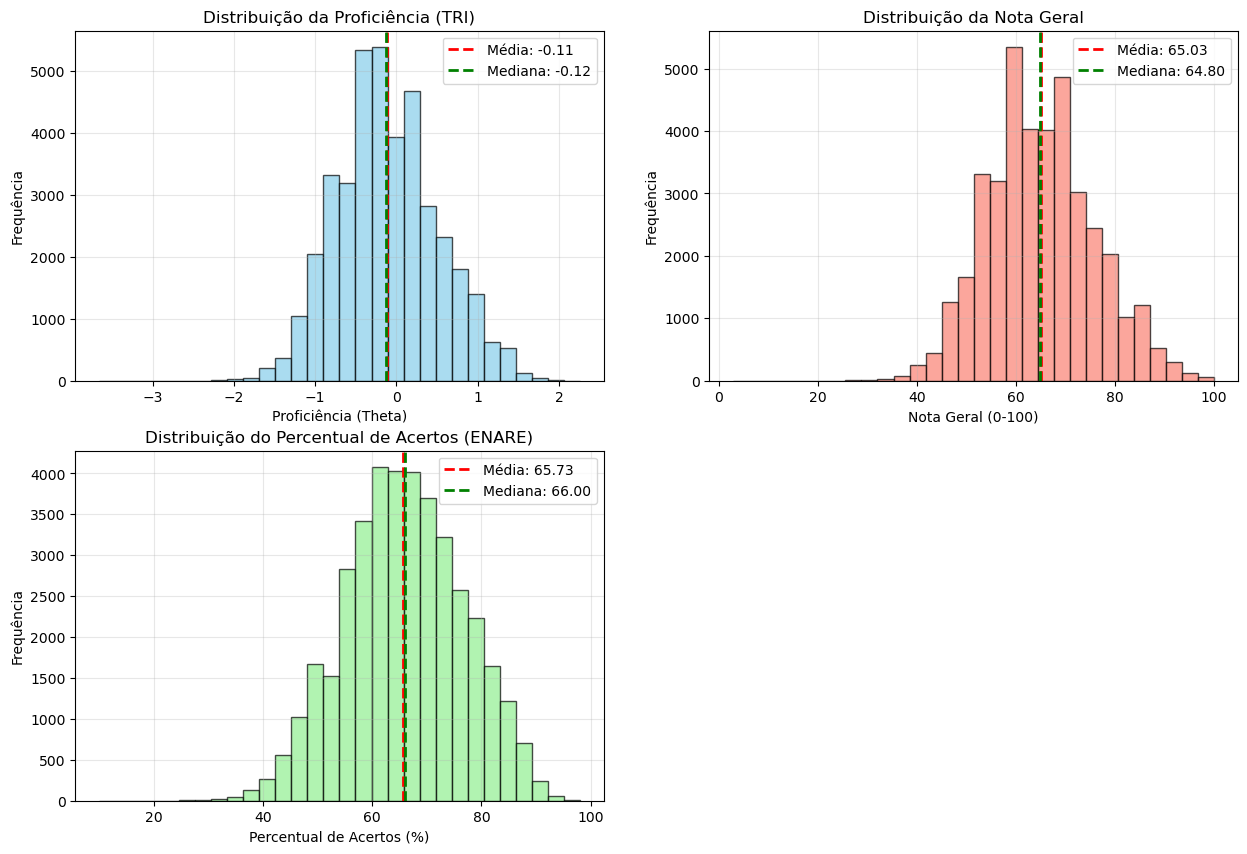

In [3]:
fig = plt.figure(figsize=(15, 10))

# Histograma da Proficiência (TRI)
ax1 = plt.subplot(2, 2, 1)
dados_prof = df_presentes['PROFICIENCIA'].dropna()
n, bins, patches = ax1.hist(dados_prof, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(dados_prof.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Média: {dados_prof.mean():.2f}')
ax1.axvline(dados_prof.median(), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {dados_prof.median():.2f}')
ax1.set_xlabel('Proficiência (Theta)')
ax1.set_ylabel('Frequência')
ax1.set_title('Distribuição da Proficiência (TRI)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Histograma da Nota Geral
ax2 = plt.subplot(2, 2, 2)
dados_nt = df_presentes['NT_GER'].dropna()
n, bins, patches = ax2.hist(dados_nt, bins=30, color='salmon', edgecolor='black', alpha=0.7)
ax2.axvline(dados_nt.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Média: {dados_nt.mean():.2f}')
ax2.axvline(dados_nt.median(), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {dados_nt.median():.2f}')
ax2.set_xlabel('Nota Geral (0-100)')
ax2.set_ylabel('Frequência')
ax2.set_title('Distribuição da Nota Geral')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Histograma do Percentual de Acertos ENARE
ax3 = plt.subplot(2, 2, 3)
dados_per = df_presentes['PER_ACERTO_ENARE'].dropna()
n, bins, patches = ax3.hist(dados_per, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.axvline(dados_per.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Média: {dados_per.mean():.2f}')
ax3.axvline(dados_per.median(), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {dados_per.median():.2f}')
ax3.set_xlabel('Percentual de Acertos (%)')
ax3.set_ylabel('Frequência')
ax3.set_title('Distribuição do Percentual de Acertos (ENARE)')
ax3.legend()
ax3.grid(True, alpha=0.3)

 **Interpretação dos Histogramas:**
 *   O histograma da proficiência (TRI) mostra uma distribuição aproximadamente normal (em forma de sino), centrada por volta de -0.11. Isso confirma a análise de que a média e a mediana são próximas e que a maioria dos participantes tem proficiência um pouco abaixo do ponto médio da escala.
 *   O histograma da nota geral (0-100) também apresenta uma distribuição simétrica e bem comportada, com a maioria das notas concentrada entre 60 e 70. A média e a mediana praticamente se sobrepõem, como esperado.

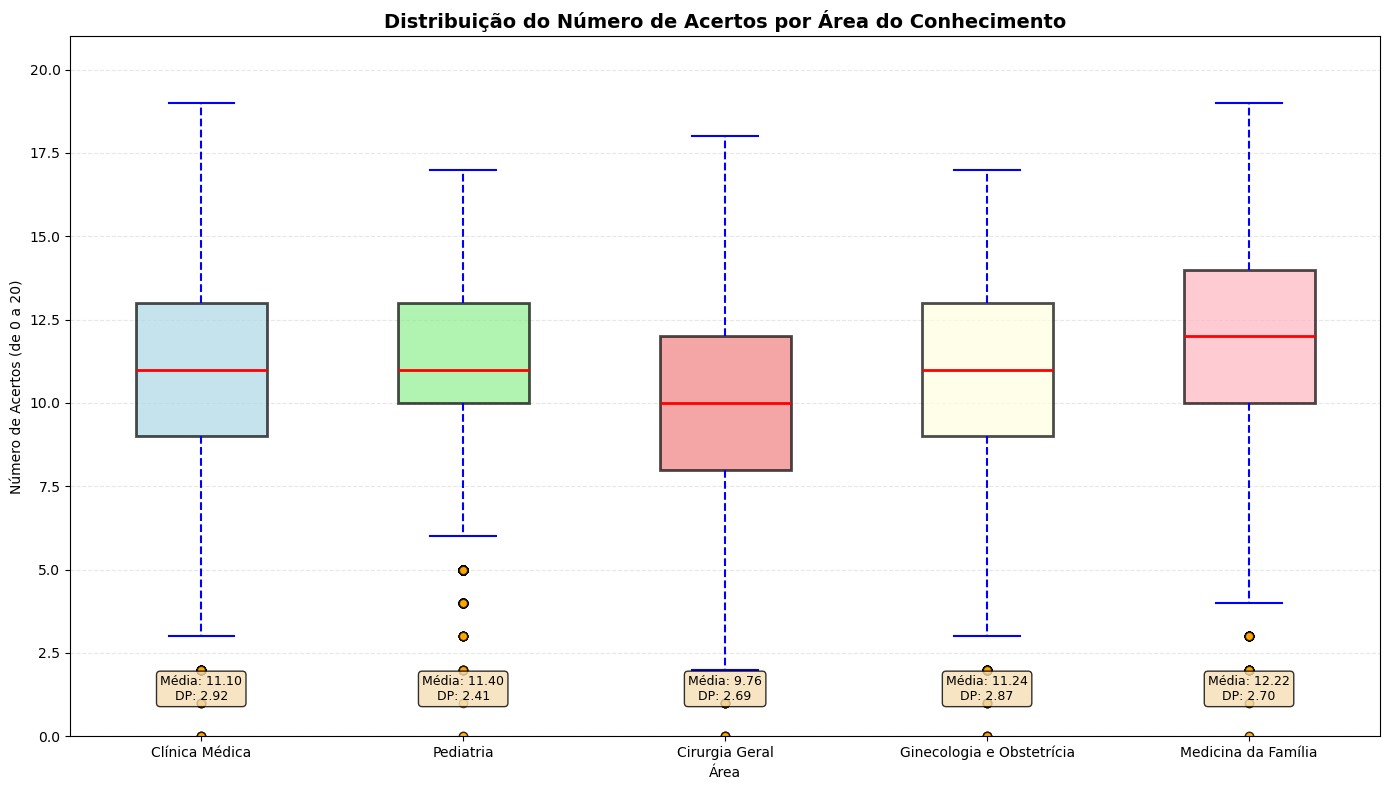

In [4]:
area_1 = df_presentes['QT_ACERTO_AREA_1'].dropna().values
area_2 = df_presentes['QT_ACERTO_AREA_2'].dropna().values
area_3 = df_presentes['QT_ACERTO_AREA_3'].dropna().values
area_4 = df_presentes['QT_ACERTO_AREA_4'].dropna().values
area_5 = df_presentes['QT_ACERTO_AREA_5'].dropna().values

nomes_areas = ['Clínica Médica', 'Pediatria', 'Cirurgia Geral', 
               'Ginecologia e Obstetrícia', 'Medicina da Família']
dados_areas = [area_1, area_2, area_3, area_4, area_5]
cores = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']

# Criando a figura para os boxplots
fig = plt.figure(figsize=(14, 8))

# Criando o boxplot
box = plt.boxplot(dados_areas, 
                  patch_artist=True,
                  labels=nomes_areas,
                  medianprops={'color': 'red', 'linewidth': 2},
                  whiskerprops={'color': 'blue', 'linewidth': 1.5, 'linestyle': '--'},
                  capprops={'color': 'blue', 'linewidth': 1.5},
                  flierprops={'marker': 'o', 'markerfacecolor': 'orange', 
                              'markersize': 6, 'alpha': 0.6},
                  boxprops={'linewidth': 2})

# Colorindo os boxes
for patch, color in zip(box['boxes'], cores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Distribuição do Número de Acertos por Área do Conhecimento', fontsize=14, fontweight='bold')
plt.xlabel('Área')
plt.ylabel('Número de Acertos (de 0 a 20)')
plt.ylim(0, 21)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

# Adicionando anotações com estatísticas
medias = [np.mean(area_1), np.mean(area_2), np.mean(area_3), np.mean(area_4), np.mean(area_5)]
desvios = [np.std(area_1), np.std(area_2), np.std(area_3), np.std(area_4), np.std(area_5)]

for i, (media, desvio) in enumerate(zip(medias, desvios)):
    plt.text(i+1, 1, f'Média: {media:.2f}\nDP: {desvio:.2f}', 
             ha='center', va='bottom', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

 **Interpretação do Boxplot:**
 *   O boxplot confirma a análise das médias. A mediana (linha central do box) para `Medicina da Família` é ligeiramente mais alta do que para as outras áreas, indicando que os participantes, em geral, acertaram mais questões nessa área.
 *   A variabilidade (altura dos boxes e comprimento das barras) é muito semelhante entre as cinco áreas, o que sugere que a prova tinha um nível de dificuldade consistente em termos de dispersão dos acertos.
